In [1]:
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
graph = nx.Graph()

In [3]:
graph.add_edges_from([(1, 2), (2, 3), (1, 3), (1, 4), (2, 4), (3, 4)])

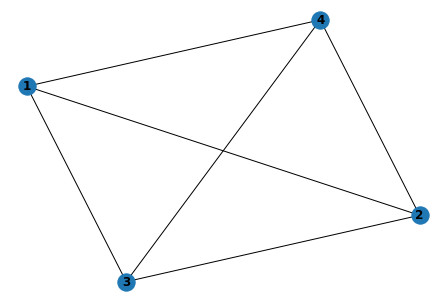

In [4]:
nx.draw(graph, with_labels=True, font_weight='bold')

Node: 1
Neighbors: [2, 3, 4]
Connections: [(1, 2), (1, 3), (1, 4)]

Node: 2
Neighbors: [1, 3, 4]
Connections: [(2, 1), (2, 3), (2, 4)]

Node: 3
Neighbors: [2, 1, 4]
Connections: [(3, 2), (3, 1), (3, 4)]

Node: 4
Neighbors: [1, 2, 3]
Connections: [(4, 1), (4, 2), (4, 3)]



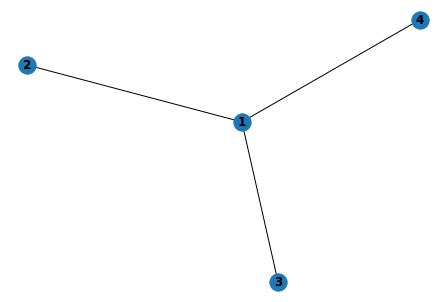

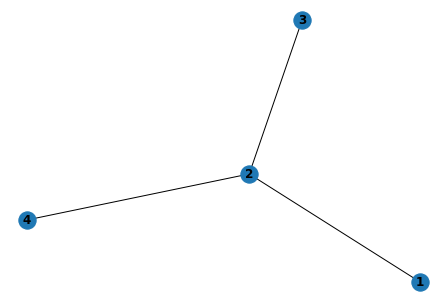

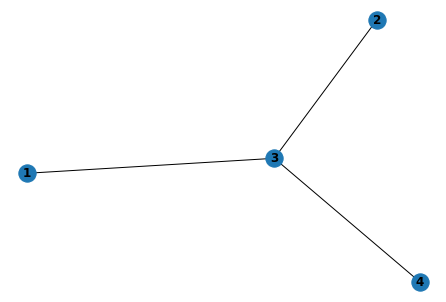

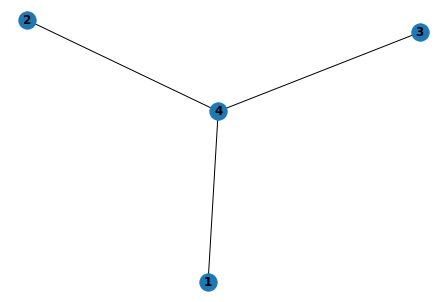

In [5]:
for node, neighbors in graph.adj.items():
    node_neighbors_graph = nx.Graph()
    edges_list = [(node, neighbor) for neighbor in neighbors.keys()]
    node_neighbors_graph.add_edges_from(edges_list)
    print(f'Node: {node}')
    print(f'Neighbors: {list(neighbors.keys())}')
    print(f'Connections: {edges_list}')
    print()

    plt.figure()
    nx.draw(node_neighbors_graph, with_labels=True, font_weight='bold')

plt.show()

In [6]:
def draw_node_neighbors(graph, node):
    if node not in graph:
        print(f'Node {node} does not exist.')
        return

    node_neighbors_graph = nx.Graph()
    edges_list = [(node, neighbor) for neighbor in graph[node]]
    node_neighbors_graph.add_edges_from(edges_list)

    print(f'Node: {node}')
    print(f'Connections: {edges_list}')
    print()

    plt.figure()
    nx.draw(node_neighbors_graph, with_labels=True, font_weight='bold')
    plt.show()


Node: 2
Connections: [(2, 1), (2, 3), (2, 4)]



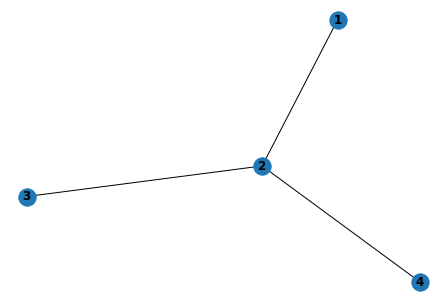

In [7]:
draw_node_neighbors(graph, 2)

Node: 3
Connections: [(3, 2), (3, 1), (3, 4)]



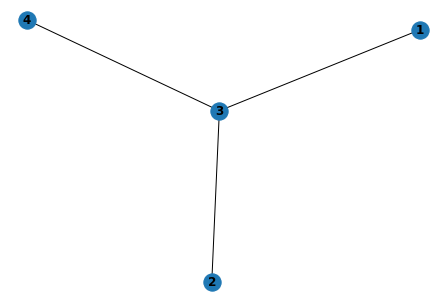

In [8]:
draw_node_neighbors(graph, 3)

In [9]:
draw_node_neighbors(graph, 5)

Node 5 does not exist.
